In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':[5,5]}, font_scale=1.4)

In [22]:
df=pd.read_csv('titanic.csv')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


# Analizing the data

## Survived

<AxesSubplot:xlabel='survived', ylabel='count'>

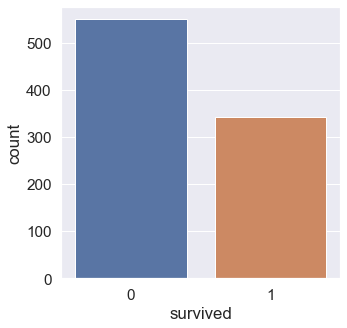

In [18]:
sns.countplot(data=df, x=df['survived'])

#### The vast majority didn't sruvive

## pclass & class

<AxesSubplot:xlabel='class', ylabel='count'>

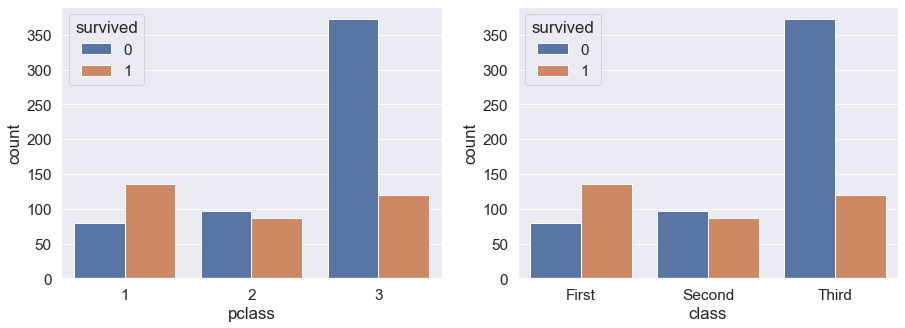

In [25]:
fig, axes=plt.subplots (1,2, figsize=(15,5), sharey=False)
sns.countplot(ax=axes[0],data=df, x=df['pclass'], hue='survived')
sns.countplot(ax=axes[1],data=df, x=df['class'], hue='survived', order=['First', 'Second','Third'])

#### The majorty of dead was from Class #3

## Sex & Who

<AxesSubplot:xlabel='who', ylabel='count'>

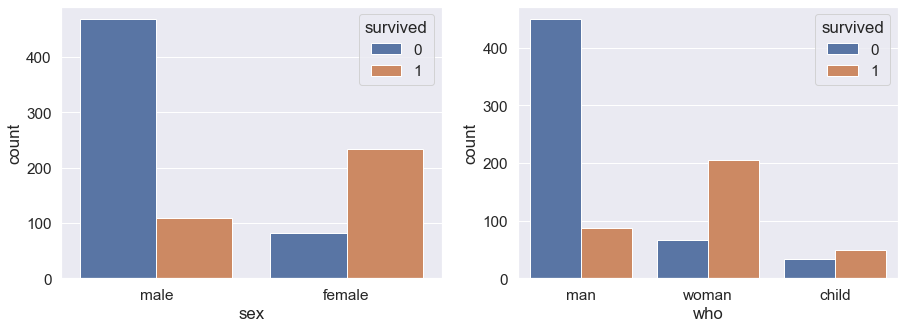

In [46]:
fig, axes=plt.subplots (1,2, figsize=(15,5), sharey=False)
sns.countplot(ax=axes[0],data=df, x=df['sex'], hue='survived')
sns.countplot(ax=axes[1],data=df, x=df['who'], hue='survived')

#### Most of the death was among men, and most of survived were Women. However, the distribution of dead women and childer to survive indicates that boarding women and children to lifeboats wasn't firmly applied. 

## sibsp & parch

<AxesSubplot:xlabel='parch', ylabel='count'>

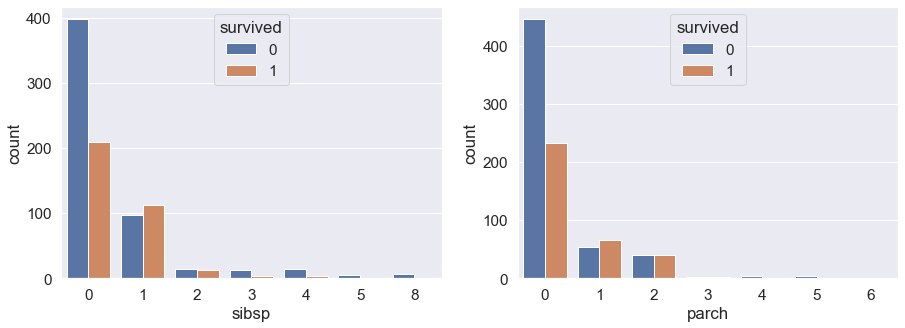

In [51]:
fig, axes=plt.subplots (1,2, figsize=(15,5), sharey=False)
sns.countplot(ax=axes[0],data=df, x=df['sibsp'], hue='survived')
sns.countplot(ax=axes[1],data=df, x=df['parch'], hue='survived')

#### The majorty of either survived or not come from individual travelers as they represent the majorty of passagners. 

## embarked and embark_town

<AxesSubplot:xlabel='embark_town', ylabel='count'>

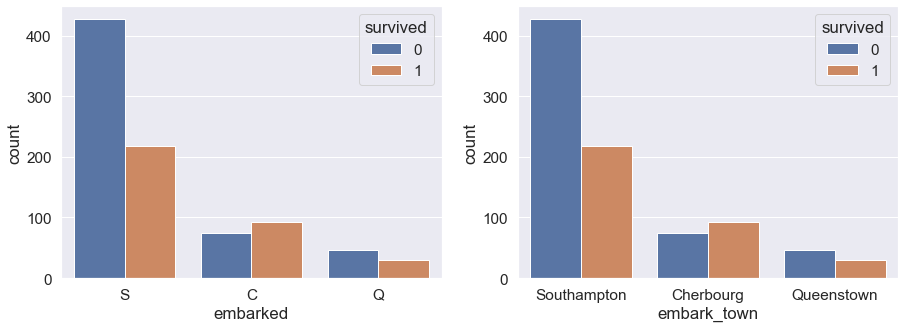

In [62]:
fig, axes=plt.subplots (1,2, figsize=(15,5), sharey=False)
sns.countplot(ax=axes[0],data=df, x=df['embarked'], hue='survived')
sns.countplot(ax=axes[1],data=df, x=df['embark_town'], hue='survived')

#### Most of the death is from Southampton; the dead to survived ratio is almost 2:1. In the other towns, there is no significant difference between dead and survived.

## age

<AxesSubplot:xlabel='age'>

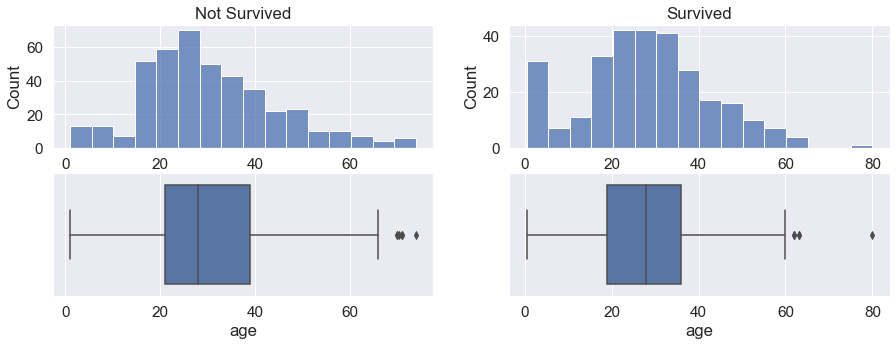

In [71]:
fig, axes=plt.subplots (2,2, figsize=(15,5), sharey=False)
sns.histplot(ax=axes[0][0],data=df, x=df['age'][df['survived']==0]).set(title='Not Survived')
sns.histplot(ax=axes[0][1],data=df, x=df['age'][df['survived']==1]).set(title='Survived')
sns.boxplot(ax=axes[1][0],data=df, x=df['age'][df['survived']==0])
sns.boxplot(ax=axes[1][1],data=df, x=df['age'][df['survived']==1])

#### The primary distribution for both survived and dead is between 20 and 40 years old. There is puls of children survivers.

## fare

<AxesSubplot:xlabel='fare'>

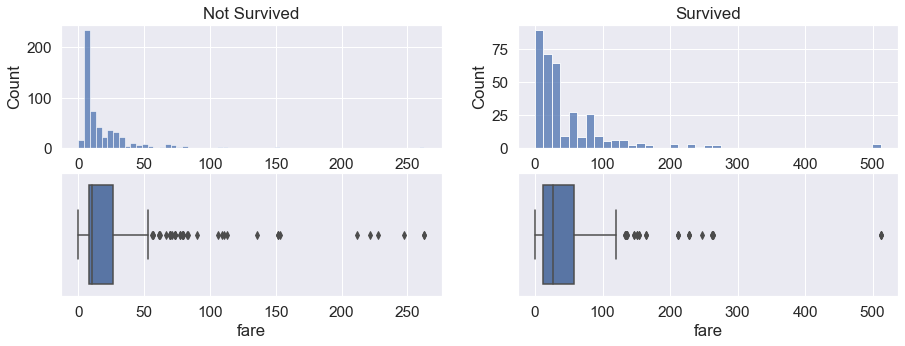

In [76]:
fig, axes=plt.subplots (2,2, figsize=(15,5), sharey=False)
sns.histplot(ax=axes[0][0],data=df, x=df['fare'][df['survived']==0]).set(title='Not Survived')
sns.histplot(ax=axes[0][1],data=df, x=df['fare'][df['survived']==1]).set(title='Survived')
sns.boxplot(ax=axes[1][0],data=df, x=df['fare'][df['survived']==0])
sns.boxplot(ax=axes[1][1],data=df, x=df['fare'][df['survived']==1])

#### The majority either of survived or not is for fares below 50